## *NOTE 1*

---

# Exploratory Data Analysis

## 학습 목표 

- `EDA`와 `pre-processing`에 대해서 이해한다.


# 데이터셋 불러오기

## 개요

- 데이터를 분석한다
- 데이터를 다룬다
- 데이터로 부터 모델링을 한다

와 같은 것들은 앞으로 여러분들이 하게 될 일입니다.

그러나 이를 위해서 제일 먼저 해야 할 것은 데이터를 불러오는 것이겠죠?

오늘 우리는 "파이썬"에 데이터를 "불러오는" 것을 연습 할 건데요. 

이를 위해서 미리 편집해둔 `KT&G`(033780) 라는 기업의 재무재표 데이터 일부분을 사용 할 겁니다. 

`KT&G` 데이터셋은 다음 그림과 같은 형태를 가지고 있습니다.

<img src='https://i.imgur.com/CBUJl84.png' width = '900'>

원본 데이터는 [네이버 금융을 통해서 확인 할 수 있으며](https://finance.naver.com/item/coinfo.nhn?code=033780&target=finsum_more)

편집되어 있는 링크의 주소는 다음과 같습니다.

<https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kt%26g/kt%26g_0.csv>




## 데이터셋을 불러오기 위한 단계:




### 1. Description을 통해 데이터셋에 대한 정보를 파악합니다.
- 행과 열의 수
- 열에 헤더가 있는지 ("데이터 이름"이 있는지?)
- 결측 데이터 (Missing data)가 있는지 확인 
- **원본의 형태를 확인하기 : 여러분이 기대하던 형태가 아닐 수도 있습니다.**

❓ 데이터셋 정보 파악을 불러오기 전에 해야하는 이유는 무엇일까요? 

### 2. `pandas.read_csv()`를 사용하여 데이터셋 불러오기를 시도하고, 오류가 있다면 원인에 대해 조사하기

- 원본 데이터셋에 따라서 때로는 행의 헤더 부분을 직접 입력 해야 할 수도 있습니다. 


## 데이터셋을 확인하는 방법. (Colab 에서)

❓ 개인적으로는 권장하지 않습니다.

In [ ]:
# kt&g 로 변수 선언을 할 수 없기 때문에 ktng라고 선언합니다.

ktng_data_url = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kt%26g/kt%26g_0.csv'

### 1. URL을 통해서 불러오기

In [ ]:
import pandas as pd

df = pd.read_csv(ktng_data_url) # pd라이브러리의 read_csv를 사용하여 ktng_data_url에 있는 데이터를 읽고, df라는 변수에 저장

df.head() 

,19/6,"12,578","3,991","3,991.1","4,452","3,245","3,228",17,"108,464","25,940","82,524","81,965",Unnamed: 12,"9,550","4,641","-1,878","-4,919",31.73,25.80,12.35,9.37,31.43,803.22,"2,351",13.77
0,19/9,"13,222","3,825","3,825","4,503","3,221","3,208",13,"106,314","20,691","85,623","85,049",NaN,"9,550","-2,278",-83,-329,28.93,24.36,12.67,9.95,24.17,836.86,"2,337",13.87
1,19/12,"11,982","2,523","2,523","1,794","1,183","1,198",-15,"107,121","20,062","87,059","86,506",NaN,"9,550",837,-501,-129,21.06,9.87,12.39,9.96,23.04,850.82,873,12.42
2,20/3,"11,784","3,150","3,150","4,156","2,939","2,930",9,"108,594","24,862","83,732","83,170",562.0,"9,550","2,336","-1,392",-86,26.73,24.94,13.05,9.79,29.69,823.16,"2,134",9.71
3,20/6,"13,188","3,947","3,947","4,020","2,935","2,931",4,"110,282","23,386","86,896","86,330",566.0,"9,550","7,855",-214,"-5,501",29.93,22.25,12.20,9.40,26.91,837.40,"2,135",10.46


### ❓ 쉼표가 있는데 csv로 정상적으로 읽힌 이유는 무엇일까요?

### ❓ 문제가 생긴 경우, 왜 그런지에 대해서 확인해야 합니다. 

In [ ]:
help(pd.read_csv) # colab에서 함수의 매뉴얼을 보는 방법입니다, 마찬가지로 별로 권장하지는 않습니다 : (help) 

<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html>

### 다시 해봅시다

In [ ]:
column_headers = ['분기','매출액','영업이익','영업이익(발표기준)','세전계속사업이익',
                  '당기순이익','당기순이익(지배)','당기순이익(비지배)','자산총계','부채총계',
                  '자본총계','자본총계(지배)','자본총계(비지배)','자본금','영업활동현금흐름',
                  '투자활동현금흐름','재무활동현금흐름','영업이익률','순이익률','ROE(%)',
                  'ROA(%)','부채비율','자본유보율','EPS(원)','PER(배)']

df = pd.read_csv(ktng_data_url, names = column_headers)

print(df.head())
print(df.shape)x

      분기     매출액   영업이익 영업이익(발표기준)  ...   부채비율   자본유보율 EPS(원)  PER(배)
0   19/6  12,578  3,991      3,991  ...  31.43  803.22  2,351   13.77
1   19/9  13,222  3,825      3,825  ...  24.17  836.86  2,337   13.87
2  19/12  11,982  2,523      2,523  ...  23.04  850.82    873   12.42
3   20/3  11,784  3,150      3,150  ...  29.69  823.16  2,134    9.71
4   20/6  13,188  3,947      3,947  ...  26.91  837.40  2,135   10.46

[5 rows x 25 columns]
(5, 25)


### ❓print(df.head) 와 df.head는 어떤 차이가 있을까요?

### 2. 로컬 파일로 부터 데이터셋 불러오기 (CSV)

모든 데이터를 온라인에서 구할 수 있는 것은 아닙니다. 

이때는 로컬 머신 (사용중인 PC)로 부터 파일을 업로드 해야 합니다. 

`colab`은 이 과정이 다른 소프트웨어 (예를 들자면, `Jupyter Notebook`) 에 비해 복잡합니다. 

`colab`은 `Google Drives`를 파일 시스템으로 사용 하기 때문에 이를 파일 경로를 직접 사용 할 수는 없습니다, 대신 작업을 위해서 `drive`에 파일을 업로드 해야만 합니다. 

### 방법 1: 구글 코랩 파일 업로드 패키지



In [ ]:
from google.colab import files
uploaded = files.upload()

### 방법 2: GUI (Graphical User Interface) 사용

In [ ]:
# df = pd.read.csv('adult (6).data') # after upload
# print(df.shape)

### ❓ 이러한 방법을 찾기 위해서 구글링 해야하는 것은 무엇일까요? ( colab local file upload )

## ❓좋은 데이터셋의 의미는 뭘까요?

<img src='https://i.imgur.com/iVGibwz.png'>

<https://www.kaggle.com/shivamb/netflix-shows>

# EDA (Exploratory Data Analysis)



## 개요

우리가 지인으로부터 생선을 선물 받았다고 해볼까요?

이를 위해서 무슨 요리를 해야할까 고민하게 될 겁니다.

그러나 가장 먼저 해야 할 것은 이 생선이 어떤 생선인지 이해하는 것입니다.

<img src='https://i.imgur.com/IdqhSEr.png' width = '800'>


- 이 생선에는 독이 있는지
- 먹을 수 없는 부분이 있는지 (지느러미등..)
- 생선이 맞긴 한 건지
- 요리를 위한 가정이 맞는지 (**신선하다** -> **회도 가능하다**)

와 같은 요인들을 고려해야합니다.

## 데이터

데이터도 마찬가지로, 정말 정말 정말로 잘 설계되고, 수집된 데이터가 아니라면 

raw data (원본데이터)를 바로 분석에 사용하기에는 어렵습니다.

데이터는 일반적으로 **"사각형"**의 형태를 가지고 있습니다. (`Spreadsheet`, `DB`등)

<img src='https://i.imgur.com/I0tzziJ.png' width = '500'> 

천재적인 인지능력이 있지 않는 이상, 이 테이블형태의 숫자만 보고 인사이트를 바로 얻기는 어렵겠죠.

이를 위해서 전체적인 "견적"을 내는 분석이 EDA 입니다.

## EDA 

EDA란, 데이터 분석에 있어서 매우 중요한, 초기 분석의 단계를 의미하며 
- 시각화 같은 도구를 통해서 패턴을 발견하거나
- 데이터의 특이성을 확인하거나
- 통계와 그래픽 (혹은 시각적 표현)을 통해서 가설을 검정하는 과정 등을 포함합니다. 

EDA의 방법은 크게 2가지 (Graphic, Non-Graphic) 으로 나눠질 수 있으며

- Graphic : 차트 혹은 그림 등을 이용하여 데이터를 확인하는 방법입니다.

- Non-Graphic :그래픽적인 요소를 사용하지 않는 방법으로, 주로 **Summary Statistics**를 통해 데이터를 확인하는 방법입니다.

동시에, EDA의 "타겟"(데이터) 또한 2가지 (Univariate, Multi-variate)로 나눠집니다.

- Multi-variate 의 경우 여러 **변수들간의 관계를 보는 것**이 주요 목적입니다.

### Uni - Non Graphic

Sample Data의 Distribution을 확인하는 것이 주목적입니다.


Numeric data의 경우 summary statistics를 제일 많이 활용하는데요. 이에는

- Center (Mean, Median, Mod)
- Spread (Variance, SD, IQR, Range)
- Modality (Peak)
- Shape (Tail, Skewness, Kurtosis)
- Outliers 등을 확인합니다.

Categorical data의 경우 occurence, frequency, tabulation등을 할 수 있습니다.

| Statistic / College | H&SS | MCS | SCS | Other | Total |
|:-:|:-:|:-:|:-:|:-:|:-:|
|Count|5|6|4|5|20|
|Propotion|0.25|0.3|0.2|0.25|1|
|Percent|25%|30%|20%|25%|100%|


### Uni - Graphic

Histogram 혹은 Pie chart, Stem-leaf plot, Boxplot, QQplot 등을 사용합니다.

그러나 만약 값들이 너무 다양하다면, Binning, Tabulation등을 활용 할 수도 있습니다.



###  QQPlot

**데이터의 분포와 이론상 분포가 잘 일치하는가** 를 확인 할 수 있는 방법입니다.

ex) **성적 분포가 고를 것이다.**

- A반 : 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

- B반 : 10, 15, 20, 75, 80, 85, 90, 95, 95, 100

<img src='https://i.imgur.com/S6a2oUz.png' width = '500'>

<img src='https://i.imgur.com/6ryhglR.png' width = '500'>

다른 QQPlot들

<img src='https://i.imgur.com/Xxc824A.png' width = '500'>






### Multi - Non Graphic

- Relationship을 보는 것이 주된 목표이며 
- Cross-Tabulation 
- Cross-Statistics (Correlation, Covariance)

등을 사용합니다.

|Subject ID|Age Group|Sex|
|:-:|:-:|:-:|
|GW|Young|F|
|JA|Middle|F|
|TJ|Young|M|
|JMA|Young|M|
|JMO|Middle|F|
|JQA|Old|F|
|AJ|Old|F|
|MVB|Young|M|
|WHH|Old|F|
|JT|Young|F|
|JKP|Middle|M|


다음과 같은 Categorical 데이터는

|Age Group / Sex|Female|Male|Total|
|:-:|:-:|:-:|:-:|
|Young|2|3|5|
|Middle|2|1|3|
|Old|3|0|3|
|Total|7|4|11|

과 같이 Cross-Tabulation을 적용 할 수 있으며 한편 Numerical Feature들의 경우 아래와 같이 Cross Statistics를 통해 EDA를 할 수도 있습니다. 

(원래는 색상이 없는 table이지만, 색상을 넣어 heat map 처럼 적용도 가능)

<img src='https://www.vertica.com/wp-content/uploads/2019/09/corr_matrix_Titanic.png' width = '500'>

### Multi - Graphic

- Category & Numeric : Boxplots, Stacked bar, Parallel Coordinate, Heatmap

<img src='https://kr.mathworks.com/help/examples/stats/win64/CreateBoxPlotsForGroupedDataExample_01.png' width = '500'>

<img src='https://chartio.com/assets/9bfb20/tutorials/charts/stacked-bar-charts/073137bf11f1c2226f68c3188128e28d66115622dcdecc9bc208a6d4117f53e8/stacked-bar-example-1.png' width = '500'>

<img src='https://datavizcatalogue.com/methods/images/anatomy/SVG/parallel_coordinates.svg' width = '500'>

<img src='https://www.grapecity.com/componentone/docs/win/online-flexchart/images/discrete-heatmap.png' width = '500'>


- Numeric & Numeric : Scatter Plot

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Scatter_diagram_for_quality_characteristic_XXX.svg/1200px-Scatter_diagram_for_quality_characteristic_XXX.svg.png' width = '500'>


# pandas를 사용한 기초 EDA



## Useful Pandas Functions

### Missing Data
- isna
- isnull
- notna
- notnull
- dropna
- fillna

### Data Frame
- index
- columns
- dtypes
- info
- select_dtypes
- loc
- iloc
- insert
- head
- tail
- apply
- aggregate
- drop
- rename
- replace
- nsmallest
- nlargest
- sort_values
- sort_index
- value_counts
- describe
- shape


### Vis
- plot
- plot.area
- plot.bar
- plot.barh
- plot.box
- plot.density
- plot.hexbin
- plot.hist
- plot.kde
- plot.line
- plot.pie
- plot.scatter

## 위 내용을 참조하여 kt&g 의 매출액에 대해서 다음의 차트들을 생성해봅시다:

- Line Plot 
- Scatter Plot
- Bar plot

위와 같은 그림들이 데이터에 대해서 어떻게 다르게 표현 될까요?

데이터의 분포를 시각화 하는것이 왜 중요할까요?

### Line Plot

In [ ]:
df['순이익률']

0    25.80
1    24.36
2     9.87
3    24.94
4    22.25
Name: 순이익률, dtype: float64

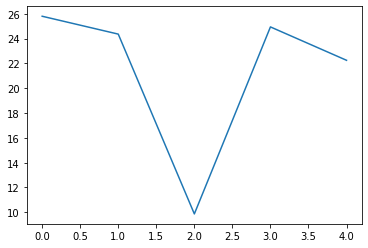

In [ ]:
df['순이익률'].plot()

### ❓ 위 그림이 의미하는 바는 무엇일까요? 어떻게 더 개선 할 수 있을까요? 
### ❓ <matplotlib.~~> 부분을 어떻게 지울 수 있을까요?

### Histogram

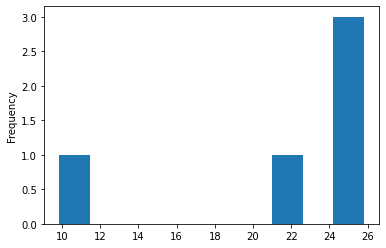

In [ ]:
df['순이익률'].plot.hist(); 

### Scatter Plot


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_te

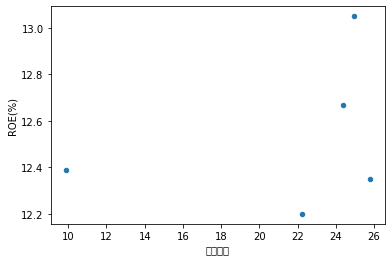

In [ ]:
df.plot.scatter('순이익률', 'ROE(%)');

### ❓ 에러의 원인과 이를 위해서 어떻게 해야할까요?

### Bar Plot 

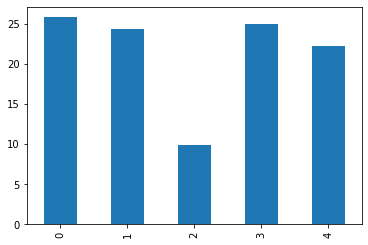

In [ ]:
df['순이익률'].plot.bar();

### Horizontal Bar Plot

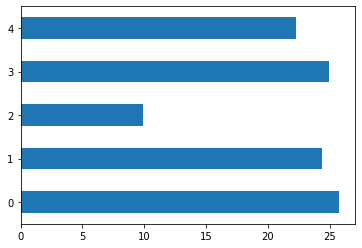

In [ ]:
df['순이익률'].plot.barh();

### ❓ 이 kt&g 데이터에 EDA를 하는 것으로 얻은 결론은 무엇이 있을까요?

# Data Preprocessing

> Garbage In Garbage Out

<img src='https://i.imgur.com/12gQMh2.png' width = '500'>

데이터 혹은 분석 목적, 작업마다 해야하는 데이터의 전처리는 다르지만 크게 다음과 같은 flow를 갖습니다.

<img src='https://i.imgur.com/RIMhucU.png' width = '800'>



## Cleaning 

> noise 를 제거하거나, inconsistency 를 보정하는 과정을 의미합니다.

데이터의 정확도, 완성도, 일관성, 신뢰성과 같은

||Feature A|Feature B|Feature C|
|:-:|:-:|:-:|:-:|
|Data1|1|2|"Chicken"|
|Data2|2||5|
|Data3|4|3$|6|
|Data4|4444|3|7|

위의 예시와 같이

값이 빠져있거나, 잘못 입력되거나 혹은 일관성을 가지지 않는 

데이터들을 제거 / 보정 하는 과정들이 포함되어 있습니다.

> 데이터를 분석하기 전에 **오류**를 깨끗이 다듬지 않으면 잘못된 데이터를 통해 잘못된 인사이트, 결론을 얻을 수 있습니다.

<img src='https://i.imgur.com/roFkhbo.png'> 




### Missing Values 

- Ignore the tuple (결측치가 있는 데이터 삭제)
- Manual Fill (수동으로 입력)
- Global Constant ("Unknown")
- Imputation (All mean, Class mean, Inference mean, Regression 등)

### Noisy data

Noise란, 큰 방향성에서 벗어난 random error 혹은 variance를 포함하는 데이터를 말하며

대부분 descriptive statistics 혹은 visualization등 (eda)을 통해 제거가 가능합니다.

### Etc

- Binning

<img src='https://i.imgur.com/7Yve6h6.png' width = '500'>

- Regression
- Outlier analysis

## Integration

> 여러개로 나누어져 있는 데이터들을 분석하기 편하게 하나로 합치는 과정을 의미합니다.

추후에 한 예시로 `merge`를 배우게 됩니다.

## Transformation

> 데이터의 **형태**를 변환하는 작업으로, scaling이라고 부르기도 합니다.

추후에 `normalize` 등의 예시를 배우게 됩니다.


## Reduction

> 데이터를 의미있게 줄이는 것을 의미하며, dimension reduction과 유사한 목적을 갖습니다.

마찬가지로 추후에 `pca`등의 예시를 배우게 됩니다.